In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
start = dt.datetime(2012, 6, 1)
end = dt.datetime(2022, 3, 9)

stock = ['fb']
stock_data = pdr.get_data_yahoo(stock, start, end)

pair = ['snap']
pair_data = pdr.get_data_yahoo(pair, start, end)



In [3]:
main_df = pd.DataFrame()
pair_df = pd.DataFrame()

main_df["Close"] = stock_data[["Close"]]
main_df["Open"] = stock_data[["Open"]]
main_df["High"] = stock_data[["High"]]
main_df["Low"] = stock_data[["Low"]]
main_df["Volume"] = stock_data[["Volume"]]
main_df["stock_prev_close"] = main_df["Close"].shift(1)
main_df['Date'] = main_df.index

pair_df["Close"] = pair_data[["Close"]]
pair_df["Open"] = pair_data[["Open"]]
pair_df["High"] = pair_data[["High"]]
pair_df["Low"] = pair_data[["Low"]]
pair_df["Volume"] = pair_data[["Volume"]]
pair_df["pair_prev_close"] = pair_df["Close"].shift(1)
pair_df['Date'] = pair_df.index


In [4]:
merged = pd.merge(main_df.reset_index(drop=True), pair_df.reset_index(drop=True), on=["Date"], how="left")

In [5]:
merged

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,Low_y,Volume_y,pair_prev_close
0,27.719999,28.889999,29.150000,27.389999,41855500,NaN,2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1,26.900000,27.200001,27.650000,26.440001,35230300,27.719999,2012-06-04,NaN,NaN,NaN,NaN,NaN,NaN
2,25.870001,26.700001,27.760000,25.750000,42473400,26.900000,2012-06-05,NaN,NaN,NaN,NaN,NaN,NaN
3,26.809999,26.070000,27.170000,25.520000,61489200,25.870001,2012-06-06,NaN,NaN,NaN,NaN,NaN,NaN
4,26.309999,27.000000,27.350000,26.150000,26159500,26.809999,2012-06-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,202.970001,209.020004,209.080002,201.419998,27263500,208.110001,2022-03-03,35.660000,37.299999,37.419998,35.009998,23087700.0,37.369999
2455,200.059998,202.369995,205.889999,198.789993,32130900,202.970001,2022-03-04,33.090000,36.389999,36.720001,32.889999,22212700.0,35.660000
2456,187.470001,200.789993,200.889999,187.279999,38560600,200.059998,2022-03-07,30.219999,33.150002,33.340000,30.190001,32356700.0,33.090000
2457,190.289993,187.850006,196.699997,186.110001,37508100,187.470001,2022-03-08,31.219999,30.010000,32.720001,29.580000,28109600.0,30.219999


In [6]:
merged['ratio_spread'] = merged['Close_x'] / merged['Close_y']
merged['prev_ratio_spread'] = merged['ratio_spread'].shift(1)
merged['close_spread'] = np.log(merged['Close_x']) - np.log(merged['Close_y'])
merged['close_spread_sma20'] = merged['close_spread'].rolling(20).mean()
merged['close_spread_std20'] = merged['close_spread'].rolling(20).std()
merged['zscore'] = (merged['close_spread'] - merged['close_spread_sma20']) / merged['close_spread_std20']
merged['prev_zscore'] = merged['zscore'].shift(1)
merged['lsr'] = np.log(merged['ratio_spread']) - np.log(merged['prev_ratio_spread'])
merged['strat_return'] = merged['prev_zscore'] * -1 * (merged['lsr'] - np.log(merged['ratio_spread']))

In [7]:
merged

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,...,pair_prev_close,ratio_spread,prev_ratio_spread,close_spread,close_spread_sma20,close_spread_std20,zscore,prev_zscore,lsr,strat_return
0,27.719999,28.889999,29.150000,27.389999,41855500,NaN,2012-06-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.900000,27.200001,27.650000,26.440001,35230300,27.719999,2012-06-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.870001,26.700001,27.760000,25.750000,42473400,26.900000,2012-06-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.809999,26.070000,27.170000,25.520000,61489200,25.870001,2012-06-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.309999,27.000000,27.350000,26.150000,26159500,26.809999,2012-06-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,202.970001,209.020004,209.080002,201.419998,27263500,208.110001,2022-03-03,35.660000,37.299999,37.419998,...,37.369999,5.691812,5.568906,1.739029,1.739140,0.131899,-0.000845,-0.275062,0.021830,-0.472337
2455,200.059998,202.369995,205.889999,198.789993,32130900,202.970001,2022-03-04,33.090000,36.389999,36.720001,...,35.660000,6.045935,5.691812,1.799386,1.715480,0.044967,1.865969,-0.000845,0.060358,-0.001470
2456,187.470001,200.789993,200.889999,187.279999,38560600,200.059998,2022-03-07,30.219999,33.150002,33.340000,...,33.090000,6.203508,6.045935,1.825115,1.716376,0.047022,2.312481,1.865969,0.025729,3.357598
2457,190.289993,187.850006,196.699997,186.110001,37508100,187.470001,2022-03-08,31.219999,30.010000,32.720001,...,30.219999,6.095131,6.203508,1.807490,1.717687,0.049240,1.823799,2.312481,-0.017625,4.220544


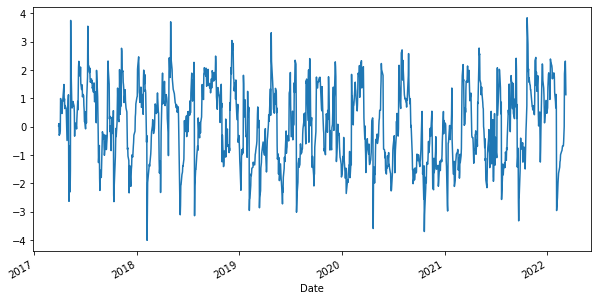

In [8]:
figsize=(10,5)
ax = merged.plot(x="Date", y="zscore", legend=False,figsize=figsize)

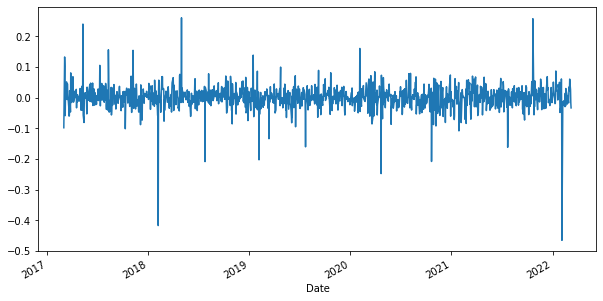

In [9]:
figsize=(10,5)
ax = merged.plot(x="Date", y="lsr", legend=False,figsize=figsize)

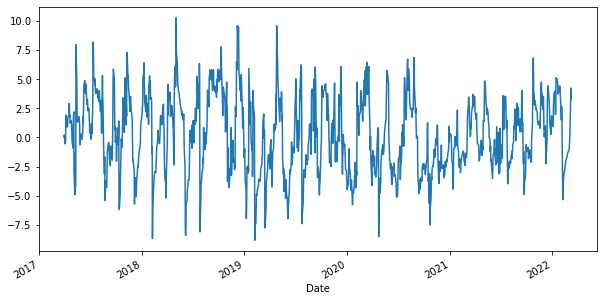

In [10]:
figsize=(10,5)
ax = merged.plot(x="Date", y="strat_return", legend=False,figsize=figsize)

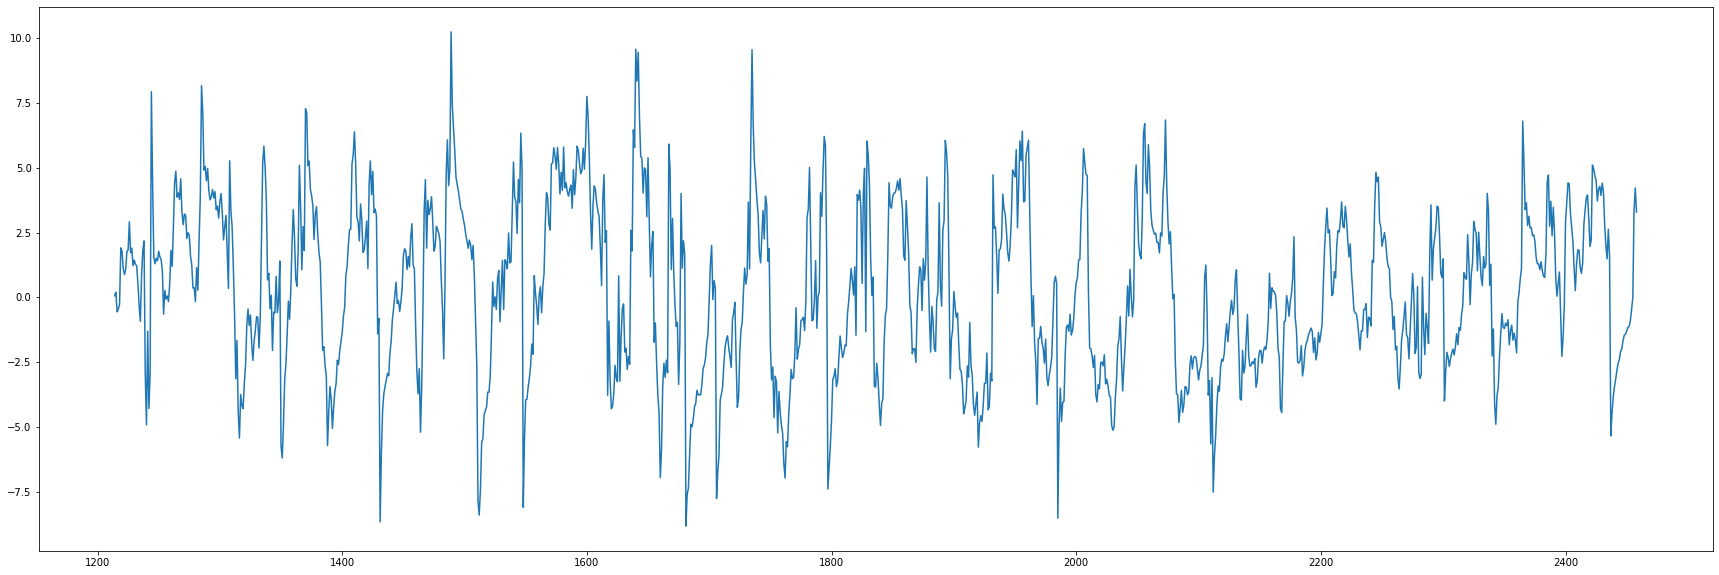

In [11]:
figsize=(30,10)
ax = merged[1200:].plot(y="strat_return", legend=False,figsize=figsize)


# Monthly Aggregates - Work in Progress - I forgot to set price to 0 - Need to rewatch video!

In [12]:
merged['date_trunc_month'] = merged.apply(lambda x: dt.datetime.strftime(x['Date'],'%Y-%m'), axis=1)

In [13]:
merged['date_trunc_month']

0       2012-06
1       2012-06
2       2012-06
3       2012-06
4       2012-06
         ...   
2454    2022-03
2455    2022-03
2456    2022-03
2457    2022-03
2458    2022-03
Name: date_trunc_month, Length: 2459, dtype: object

In [126]:
merged['is_start_of_month'] = merged.apply(lambda x: x.name == min(merged[merged['date_trunc_month'] == x['date_trunc_month']].index), axis=1)
merged['is_end_of_month'] = merged.apply(lambda x: x.name == max(merged[merged['date_trunc_month'] == x['date_trunc_month']].index), axis=1)

In [127]:
merged[merged['is_start_of_month'] == True]

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,...,close_spread,close_spread_sma20,close_spread_std20,zscore,prev_zscore,lsr,strat_return,date_trunc_month,is_start_of_month,is_end_of_month
0,27.719999,28.889999,29.150000,27.389999,41855500,NaN,2012-06-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-06,True,False
21,30.770000,31.250000,31.730000,30.549999,14122000,31.100000,2012-07-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07,True,False
42,20.879999,21.500000,21.580000,20.840000,44604400,21.709999,2012-08-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08,True,False
65,17.730000,18.080000,18.270000,17.549999,46622400,18.059999,2012-09-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-09,True,False
84,21.990000,22.080000,22.590000,21.730000,51262700,21.660000,2012-10-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,329.980011,326.040009,333.450012,326.000000,31518900,323.570007,2021-11-01,53.980000,52.990002,54.110001,...,1.810418,1.588455,0.149923,1.480520,1.723058,-0.006661,3.130933,2021-11,True,False
2391,310.600006,330.290009,330.500000,310.290009,30329600,324.459991,2021-12-01,47.259998,49.130001,50.980000,...,1.882842,1.865718,0.042765,0.400403,1.294139,-0.036278,2.483606,2021-12,True,False
2413,338.540009,338.299988,341.079987,337.190002,14537900,336.350006,2022-01-03,46.590000,47.630001,47.709999,...,1.983256,1.945001,0.057268,0.668002,0.472042,0.015890,0.928679,2022-01,True,False
2433,319.000000,314.559998,319.660004,312.119995,18023800,313.260010,2022-02-01,33.660000,34.130001,34.200001,...,2.248881,2.180036,0.103881,0.662735,0.878561,-0.015682,1.989558,2022-02,True,False


```sql
SELECT
    startofmonth,
    stock1,
    stock2,
    SUM(lsr) as lsr
FROM dailyreturns
GROUP BY
    startofmonth,
    stock1,
    stock2
```

In [128]:
merged[(merged['is_start_of_month'] == True)][['date_trunc_month','lsr']]

,date_trunc_month,lsr
0,2012-06,NaN
21,2012-07,NaN
42,2012-08,NaN
65,2012-09,NaN
84,2012-10,NaN
...,...,...
2370,2021-11,-0.006661
2391,2021-12,-0.036278
2413,2022-01,0.015890
2433,2022-02,-0.015682


<AxesSubplot:>

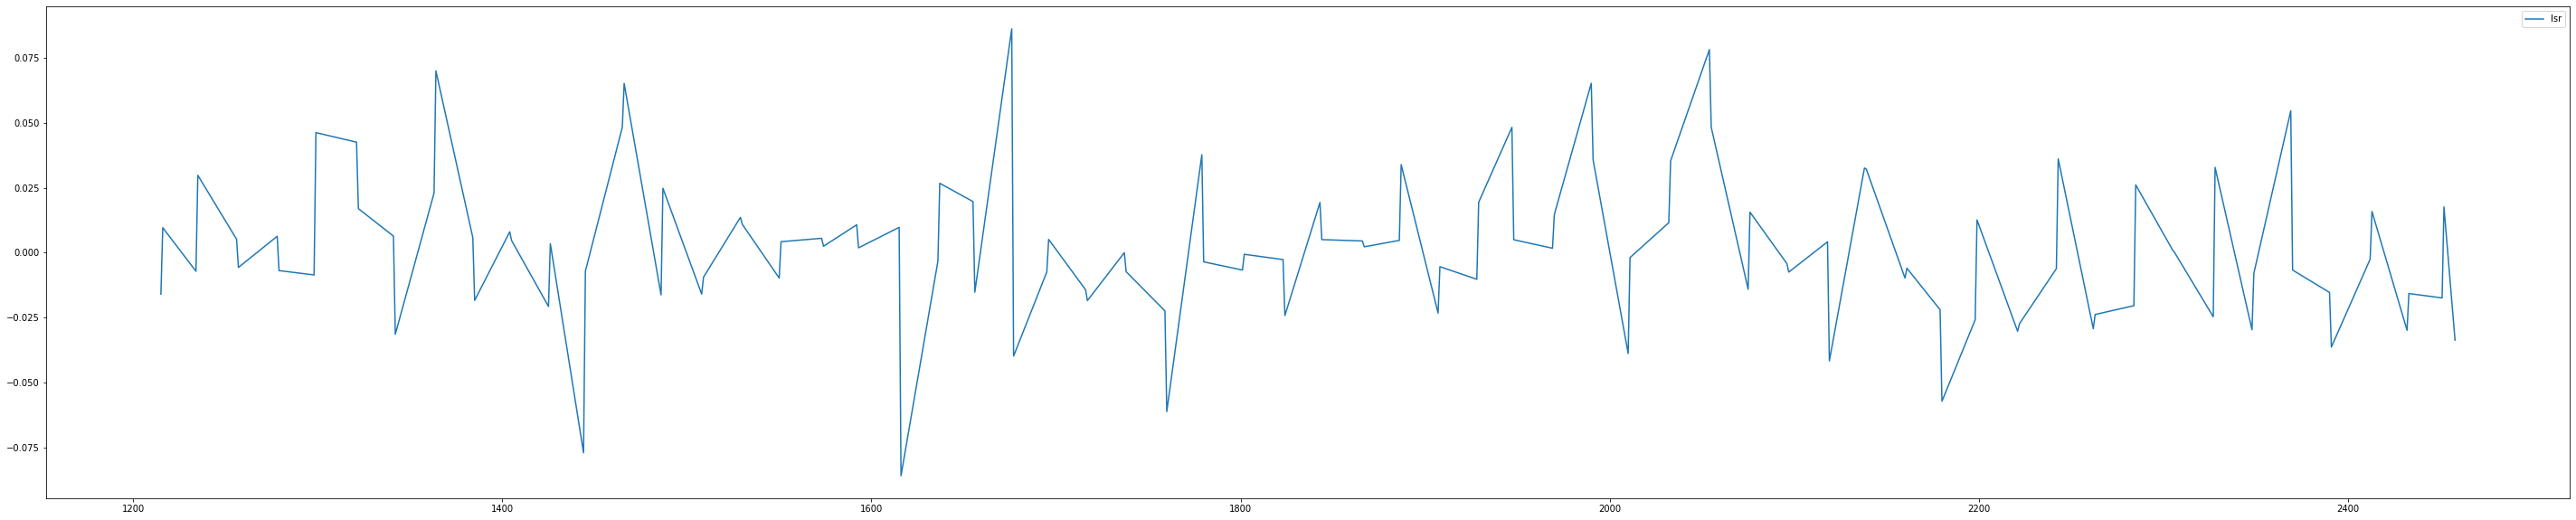

In [133]:
merged[(merged['is_start_of_month'] == True) | (merged['is_end_of_month'] == True)][['date_trunc_month','lsr']].plot()

In [139]:
merged['lsr'] = merged.apply(lambda x: 0 if x['is_end_of_month'] is True else x['lsr'], axis=1)

In [140]:
merged[merged['is_end_of_month'] == True]

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,...,close_spread,close_spread_sma20,close_spread_std20,zscore,prev_zscore,lsr,strat_return,date_trunc_month,is_start_of_month,is_end_of_month
20,31.100000,31.920000,31.990000,30.760000,19526900,31.360001,2012-06-29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-06,False,True
41,21.709999,23.370001,23.370001,21.610001,56179400,23.150000,2012-07-31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-07,False,True
64,18.059999,18.680000,18.700001,18.030001,58764200,19.090000,2012-08-31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-08,False,True
83,21.660000,20.570000,21.950001,20.500000,65486000,20.320000,2012-09-28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-09,False,True
104,21.110001,20.820000,21.500000,20.730000,99378200,21.940001,2012-10-31,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-10,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,324.459991,335.000000,335.809998,323.429993,25390000,338.029999,2021-11-30,47.610001,48.779999,49.400002,...,1.919119,1.863485,0.042989,1.294139,1.797969,0.0,3.477955,2021-11,False,True
2412,336.350006,343.019989,343.440002,336.269989,12870500,344.359985,2021-12-31,47.029999,47.799999,48.450001,...,1.967367,1.939871,0.058248,0.472042,0.582603,0.0,1.147648,2021-12,False,True
2432,313.260010,300.679993,313.790009,299.320007,21579500,301.709991,2022-01-31,32.540001,30.650000,32.630001,...,2.264563,2.166754,0.111329,0.878561,1.214977,0.0,2.787603,2022-01,False,True
2451,211.029999,207.679993,213.149994,206.830002,34239800,210.479996,2022-02-28,39.939999,39.490002,40.959999,...,1.664622,1.823375,0.234678,-0.676471,-0.681321,0.0,-1.145976,2022-02,False,True


In [144]:
monthly_agg = merged[(merged['is_start_of_month'] == True) | (merged['is_end_of_month'] == True)].copy()

In [145]:
monthly_agg.reset_index(drop=True)
monthly_agg = monthly_agg.dropna()

In [147]:
monthly_agg

,Close_x,Open_x,High_x,Low_x,Volume_x,stock_prev_close,Date,Close_y,Open_y,High_y,...,close_spread,close_spread_sma20,close_spread_std20,zscore,prev_zscore,lsr,strat_return,date_trunc_month,is_start_of_month,is_end_of_month
1215,142.050003,142.309998,142.630005,141.889999,11478300,142.410004,2017-03-31,22.530001,22.049999,22.620001,...,1.841331,1.859531,0.060250,-0.302069,0.108298,0.000000,0.201138,2017-03,False,True
1216,142.279999,141.929993,142.470001,140.820007,13564000,142.050003,2017-04-03,22.350000,22.700001,22.900000,...,1.850971,1.864349,0.055047,-0.243029,-0.302069,0.009639,-0.556210,2017-04,True,False
1234,150.250000,149.500000,151.529999,149.070007,30652200,147.699997,2017-04-28,22.549999,22.049999,22.590000,...,1.896566,1.910969,0.029647,-0.485817,-0.166843,0.000000,-0.317617,2017-04,False,True
1235,152.460007,151.740005,152.570007,151.419998,25218300,150.250000,2017-05-01,22.209999,22.660000,22.840000,...,1.926360,1.915220,0.024843,0.448411,-0.485817,0.029794,-0.921384,2017-05,True,False
1256,151.460007,152.699997,153.350006,151.089996,18023900,152.380005,2017-05-31,21.209999,21.500000,21.750000,...,1.965849,1.964126,0.062598,0.027523,-0.033430,0.000000,-0.065545,2017-05,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,313.260010,300.679993,313.790009,299.320007,21579500,301.709991,2022-01-31,32.540001,30.650000,32.630001,...,2.264563,2.166754,0.111329,0.878561,1.214977,0.000000,2.787603,2022-01,False,True
2433,319.000000,314.559998,319.660004,312.119995,18023800,313.260010,2022-02-01,33.660000,34.130001,34.200001,...,2.248881,2.180036,0.103881,0.662735,0.878561,-0.015682,1.989558,2022-02,True,False
2451,211.029999,207.679993,213.149994,206.830002,34239800,210.479996,2022-02-28,39.939999,39.490002,40.959999,...,1.664622,1.823375,0.234678,-0.676471,-0.681321,0.000000,-1.145976,2022-02,False,True
2452,203.490005,209.869995,211.750000,202.220001,27094900,211.029999,2022-03-01,37.840000,39.810001,41.320000,...,1.682250,1.794259,0.212097,-0.528103,-0.676471,0.017628,-1.126068,2022-03,True,False


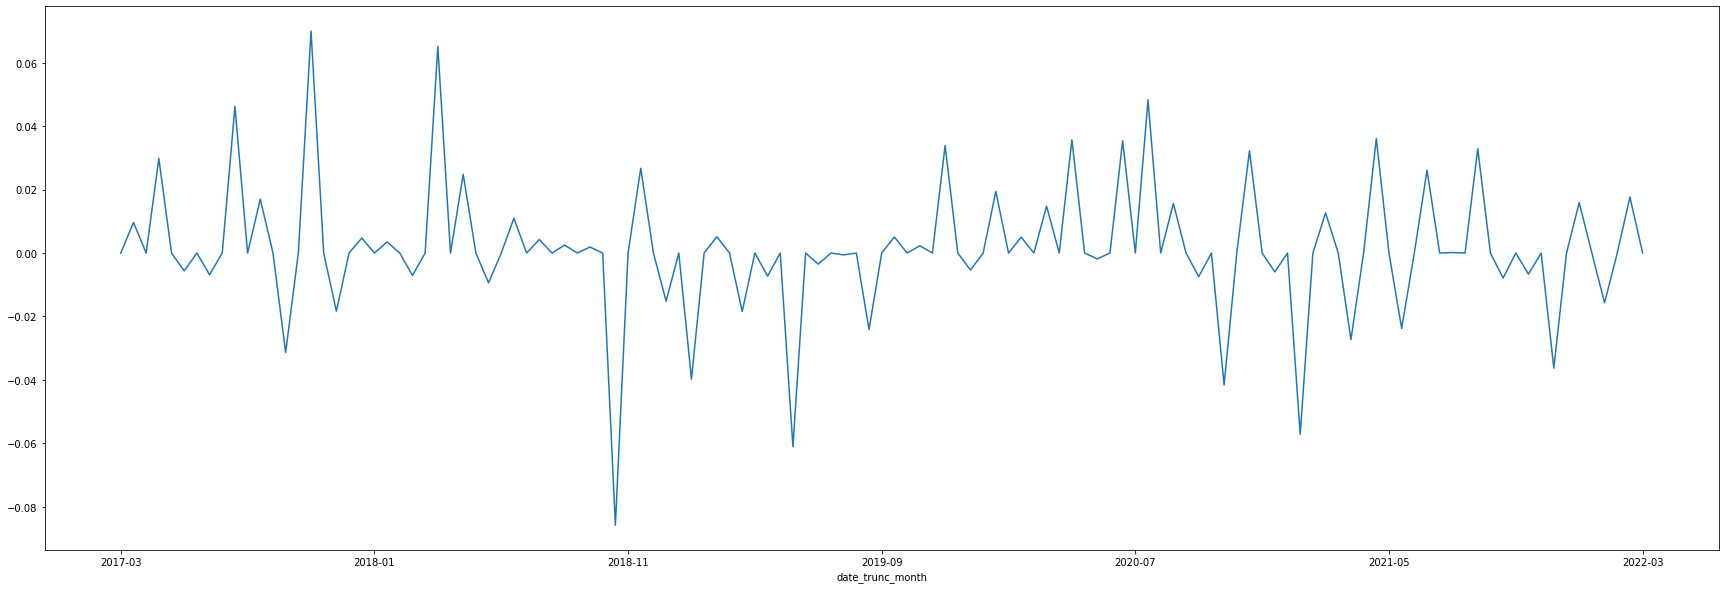

In [149]:
figsize=(30,10)
ax = monthly_agg.plot(y="lsr", x="date_trunc_month", legend=False,figsize=figsize)